In [1]:
import pandas as pd

df_demo = pd.read_csv("/Users/priyanka/Documents/IronHack/Lab Practics & submission/Project4/df_final_demo.txt")
df_demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [2]:
df_experiment = pd.read_csv("/Users/priyanka/Documents/IronHack/Lab Practics & submission/Project4/df_final_experiment_clients.txt")

df_experiment

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [3]:
df_web_data_1 = pd.read_csv("/Users/priyanka/Documents/IronHack/Lab Practics & submission/Project4/df_final_web_data_pt_1.txt")
df_web_data_1

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
343136,2443347,465784886_73090545671,136329900_10529659391_316129,confirm,2017-03-31 15:15:46
343137,2443347,465784886_73090545671,136329900_10529659391_316129,step_3,2017-03-31 15:14:53
343138,2443347,465784886_73090545671,136329900_10529659391_316129,step_2,2017-03-31 15:12:08
343139,2443347,465784886_73090545671,136329900_10529659391_316129,step_1,2017-03-31 15:11:37


In [4]:
df_web_data_2 = pd.read_csv("/Users/priyanka/Documents/IronHack/Lab Practics & submission/Project4/df_final_web_data_pt_2.txt")
df_web_data_2

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [5]:
df_web_data = pd.concat([df_web_data_1, df_web_data_2], axis=0)
df_web_data 

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [6]:
merged_df_demo_experiment = pd.merge(df_demo, df_experiment, on='client_id')
merged_df_demo_experiment

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
...,...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0,NaN
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0,NaN
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0,NaN
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0,NaN


In [7]:
merged_df_demo_experiment_clean = merged_df_demo_experiment.dropna(subset=['Variation'])
merged_df_demo_experiment_clean

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
...,...,...,...,...,...,...,...,...,...,...
50495,1780858,21.0,262.0,68.5,M,3.0,372100.59,6.0,9.0,Test
50496,6967120,21.0,260.0,68.5,M,3.0,4279873.38,6.0,9.0,Control
50497,5826160,20.0,249.0,56.5,F,2.0,44837.16,2.0,5.0,Test
50498,8739285,19.0,229.0,69.5,F,2.0,44994.24,1.0,4.0,Test


In [ ]:
merged_df_demo_experiment_clean = merged_df_demo_experiment_clean.dropna(subset=['clnt_age'])
merged_df_demo_experiment_clean

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(merged_df_demo_experiment_clean['clnt_age'], bins=20, kde=True)
plt.title("Age Distribution of Clients")
plt.show()

In [ ]:
merged_df_demo_experiment_clean.describe()

In [ ]:
# Overall
#The average client age on the test group is 47 years old, the minimum is 17 and the maximum is 96. 
#The average client holds approximately 2.25 accounts (minimum of 1 and maximum of 7) and holds an average balance of 149,516.8 in all accounts (minimum of 23,789.44 and maximum of 16,320,040).
#In average the clients have been with Vanguard for 12.03 years or 150.41 months (maximum of 55 or 669 and minimum of 2 or 33).

In [ ]:
merged_df_demo_experiment_clean_test = merged_df_demo_experiment_clean[merged_df_demo_experiment_clean['Variation'] == "Test"]
merged_df_demo_experiment_clean_test = merged_df_demo_experiment_clean_test.reset_index(drop=True)
merged_df_demo_experiment_clean_test

In [ ]:
merged_df_demo_experiment_clean_test.describe()

In [ ]:
# Test Group
#The average client age on the test group is 47 years old, the minimum is 17 and the maximum is 96. 
#The average client holds approximately 2.25 accounts (minimum of 1 and maximum of 7) and holds an average balance of 148,962.6 in all accounts (minimum of 23,789.44 and maximum of 16,320,040).
#In average the clients have been with Vanguard for 11.98 years or 149.85 months (maximum of 55 or 669 and minimum of 2 or 33).

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(merged_df_demo_experiment_clean_test['clnt_age'], bins=20, kde=True)
plt.title("Age Distribution of Clients")
plt.show()

In [8]:
merged_df_demo_experiment_clean_control = merged_df_demo_experiment_clean[merged_df_demo_experiment_clean['Variation'] == "Control"]
merged_df_demo_experiment_clean_control= merged_df_demo_experiment_clean_control.reset_index(drop=True)
merged_df_demo_experiment_clean_control

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
1,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
2,3727881,5.0,71.0,30.5,U,2.0,23915.60,0.0,3.0,Control
3,272934,5.0,66.0,58.5,U,2.0,27021.42,2.0,5.0,Control
4,285619,30.0,369.0,67.5,M,2.0,299388.72,3.0,6.0,Control
...,...,...,...,...,...,...,...,...,...,...
23527,6662941,7.0,84.0,36.0,F,2.0,83101.84,4.0,7.0,Control
23528,2787512,23.0,283.0,48.0,F,3.0,123618.60,1.0,4.0,Control
23529,9932367,23.0,280.0,57.0,F,2.0,94466.55,6.0,9.0,Control
23530,4079649,23.0,276.0,62.5,M,3.0,57575.28,4.0,7.0,Control


In [ ]:
merged_df_demo_experiment_clean_control.describe()

In [ ]:
#Control group
#The average client age on the control group is 47 years old, the minimum is 17 and the maximum is 96. 
#The average client holds approximately 2.26 accounts (minimum of 1 and maximum of 7) and holds an average balance of 150,151.9 in all accounts (minimum of 23,789.44 and maximum of 16,320,040).
#In average the clients have been with Vanguard for 12.09 years or 151.06 months (maximum of 55 or 669 and minimum of 2 or 33). 

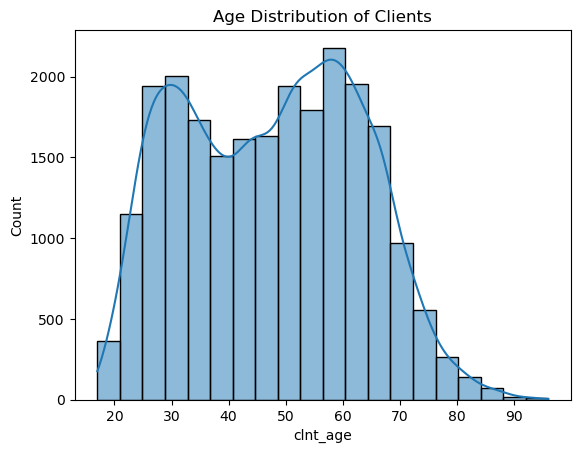

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(merged_df_demo_experiment_clean_control['clnt_age'], bins=20, kde=True)
plt.title("Age Distribution of Clients")
plt.show()

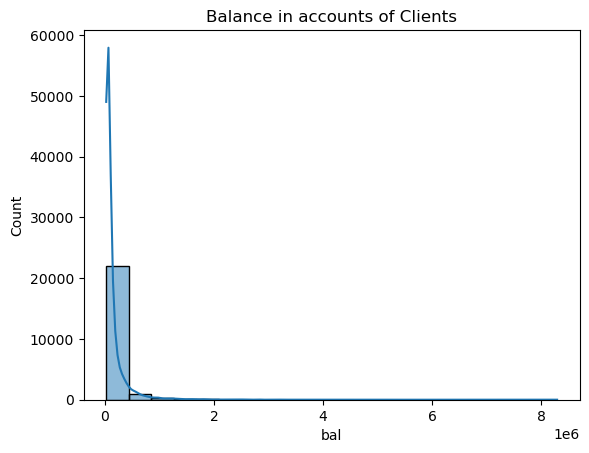

In [10]:
sns.histplot(merged_df_demo_experiment_clean_control['bal'], bins=20, kde=True)
plt.title("Balance in accounts of Clients")
plt.show()

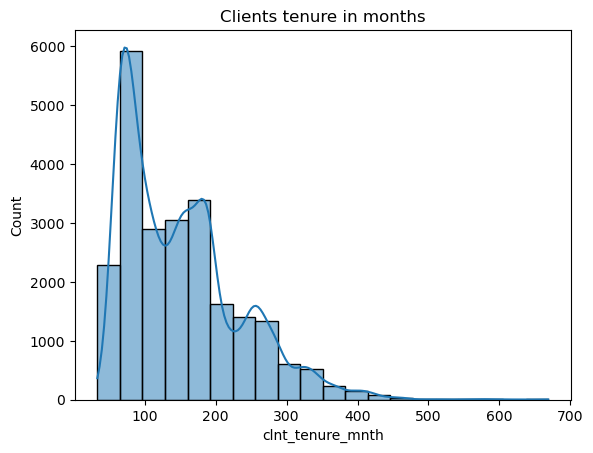

In [11]:
sns.histplot(merged_df_demo_experiment_clean_control['clnt_tenure_mnth'], bins=20, kde=True)
plt.title("Clients tenure in months")
plt.show()

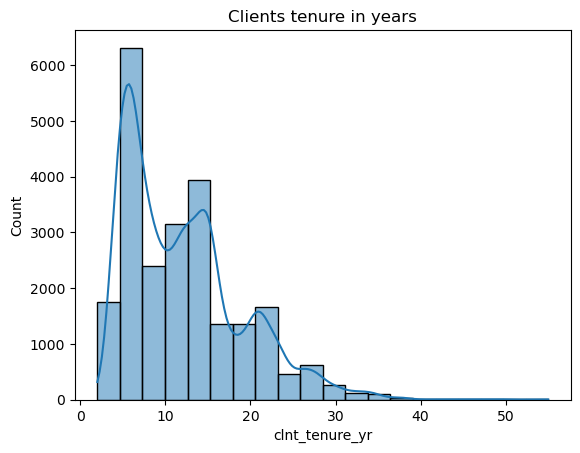

In [12]:
sns.histplot(merged_df_demo_experiment_clean_control['clnt_tenure_yr'], bins=20, kde=True)
plt.title("Clients tenure in years")
plt.show()

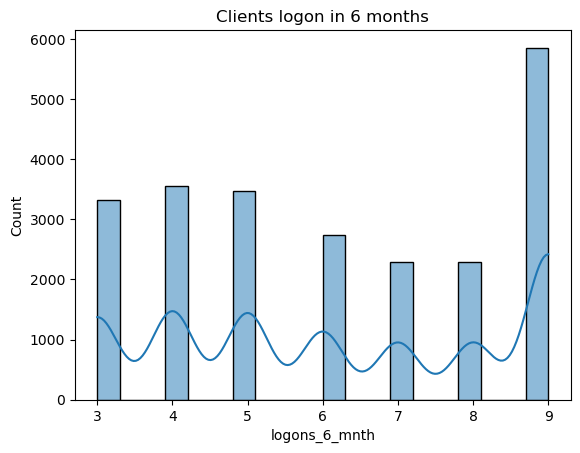

In [14]:
sns.histplot(merged_df_demo_experiment_clean_control['logons_6_mnth'], bins=20, kde=True)
plt.title("Clients logon in 6 months")
plt.show()

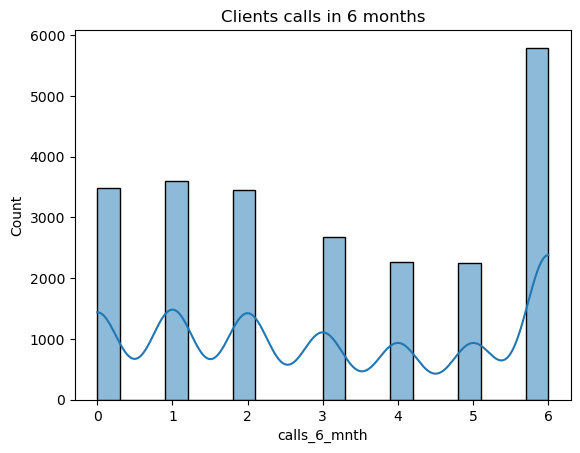

In [15]:
sns.histplot(merged_df_demo_experiment_clean_control['calls_6_mnth'], bins=20, kde=True)
plt.title("Clients calls in 6 months")
plt.show()

In [ ]:
merged_df_experiment_web_data = pd.merge(df_experiment, df_web_data, on='client_id')
merged_df_experiment_web_data

In [ ]:
merged_df_experiment_web_data_clean = merged_df_experiment_web_data.dropna(subset=['Variation'])
merged_df_experiment_web_data_clean

In [ ]:
merged_df_experiment_web_data_clean["visitor_id"].value_counts()

In [ ]:
merged_df_experiment_web_data_clean["process_step"].unique()